# Real Estate Prices Predictor

In [63]:
## Importing Necessary Libraries and Data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [19]:
raw_train = pd.read_csv("Data//Test.csv")
raw_test = pd.read_csv("Data//Train.csv")
sample = pd.read_csv("Data//sample_submission.csv")

In [5]:
raw_train.shape

(1459, 80)

In [34]:
raw_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [38]:
raw_test[["Alley", "FireplaceQu", "Fireplaces","PoolQC", "Fence", "MiscFeature"]]

,Alley,FireplaceQu,Fireplaces,PoolQC,Fence,MiscFeature
0,NaN,NaN,0,NaN,NaN,NaN
1,NaN,TA,1,NaN,NaN,NaN
2,NaN,TA,1,NaN,NaN,NaN
3,NaN,Gd,1,NaN,NaN,NaN
4,NaN,TA,1,NaN,NaN,NaN
...,...,...,...,...,...,...
1455,NaN,TA,1,NaN,NaN,NaN
1456,NaN,TA,2,NaN,MnPrv,NaN
1457,NaN,Gd,2,NaN,GdPrv,Shed
1458,NaN,NaN,0,NaN,NaN,NaN


In [46]:
## Replaceing repeatable columns with standardized mappings

mapping = {"Ex": 5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA": None}
qual_coms = ["FireplaceQu", "GarageQual", "GarageCond", "PoolQC", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual"]
test = raw_test.copy()

test[qual_coms] = test[qual_coms].replace(mapping)

In [50]:
## One hot encoding the rest of the categorical variables
categorical_columns = test.select_dtypes(include='object').columns

df_encoded = pd.get_dummies(test, columns= categorical_columns)

In [61]:
X = df_encoded.drop(columns=["SalePrice"])
y = df_encoded["SalePrice"]

# Filling Null values with 0 (Could be bad)
X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse**.5}')
print(f'R-squared: {r2}')

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 4.846103555526325e+28
Root Mean Squared Error: 220138673465757.16
R-squared: -6.317988863349132e+18
Coefficients: [ 1.88583912e+02  6.80791987e+02  4.10542524e+02  4.76257381e+03
  1.10261828e+04  6.13004199e+03  8.10223216e+03  5.52314988e+02
  5.79017007e+03  2.26763303e+03 -7.00288807e+02  5.04678052e+03
 -2.06482802e+03  4.92298216e+14  1.69669172e+14  4.78672107e+14
 -4.72572177e+14  3.67738582e+02 -2.34133086e+13 -2.66161540e+13
 -2.89957925e+12  3.17545634e+13  1.23634686e+03 -2.79948104e+02
  1.14234502e+03  2.07455151e+03 -3.90687874e+03 -3.73970605e+03
  3.49842403e+03  6.21611184e+03  5.54221101e+03 -3.97725585e+03
  2.52316195e+03  1.68206366e+03  5.84367475e+03  5.63744405e+03
 -3.56825689e+03  1.53215787e+03  2.81240313e+02 -2.44262112e+02
  1.91494594e+03  2.60513623e+03 -5.29912265e+02  5.72064228e+03
  1.78614024e+03 -1.53501528e+03  2.20002220e+02 -7.46267083e+13
 -2.65866225e+14 -1.43829537e+14 -5.19300450e+14 -4.52669978e+14
 -1.97771566e+14 -1.9

(array([  1.,   1., 289.,   0.,   1.]),
 array([-2.16965462e+15, -1.15640643e+15, -1.43158242e+14,  8.70089947e+14,
         1.88333814e+15,  2.89658632e+15]),
 <BarContainer object of 5 artists>)

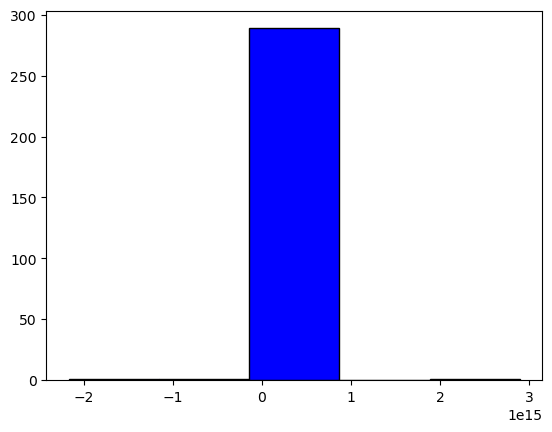

In [64]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, "Delta": y_test - y_pred})

plt.hist(results_df["Delta"], bins=5, color='blue', edgecolor='black')

,Actual,Predicted,Delta
332,284000,-2.896586e+15,2.896586e+15
691,755000,5.701351e+05,1.848649e+05
1046,556581,4.126467e+05,1.439343e+05
898,611657,4.747587e+05,1.368983e+05
1243,465000,3.825947e+05,8.240530e+04
218,311500,2.380029e+05,7.349710e+04
774,395000,3.286047e+05,6.639530e+04
231,403000,3.383675e+05,6.463254e+04
736,93500,4.001159e+04,5.348841e+04
175,243000,1.910346e+05,5.196541e+04
